In [14]:
import nbimporter
from Data_cleaning import simple


ImportError: cannot import name 'simple' from 'Data_cleaning' (Data_cleaning.ipynb)

# Read Data and explore it 

# Handling missing value

In [4]:
# Total percentage of missing values in the whole dataset
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()
    

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The telecome dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(db)

The telecome dataset contains 12.5 % missing values.


In [5]:
# Missing values per column
db.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

# Filling missing values

In [6]:
# Mode form of filling missing value
def fillMode(df,col):
    df[col] = df[col].fillna(df[col].mode()[0])

In [7]:
fillMode(db,"Start")
fillMode(db,"End")
fillMode(db,"Handset Manufacturer")
fillMode(db,"Handset Type")
fillMode(db,"IMSI")
# fillMode(db,"MSISDN/Number")
fillMode(db,"IMEI")

In [8]:
# Median form of filling missing value
def fillMedian(df,col):
    df[col] = df[col].fillna(df[col].median())

In [9]:
fillMedian(db,"Start ms")
fillMedian(db,"End ms")
fillMedian(db,"HTTP DL (Bytes)")
fillMedian(db,"HTTP UL (Bytes)")
fillMedian(db,"Total UL (Bytes)")
fillMedian(db,"Total DL (Bytes)")

In [10]:
# Median form of filling missing value
def fillMean(df,col):
    df[col] = df[col].fillna(df[col].mean())

In [11]:
fillMean(db,"Dur. (ms)")
fillMean(db,"Avg RTT DL (ms)")
fillMean(db,"Avg RTT UL (ms)")
fillMean(db,"Avg Bearer TP DL (kbps)")
fillMean(db,"Avg Bearer TP UL (kbps)")
fillMean(db,"TCP DL Retrans. Vol (Bytes)")
fillMean(db,"TCP UL Retrans. Vol (Bytes)")
fillMean(db,"Activity Duration DL (ms)")
fillMean(db,"Activity Duration UL (ms)")
fillMean(db,"DL TP < 50 Kbps (%)")
fillMean(db,"50 Kbps < DL TP < 250 Kbps (%)")
fillMean(db,"250 Kbps < DL TP < 1 Mbps (%)")
fillMean(db,"DL TP > 1 Mbps (%)")
fillMean(db,"UL TP < 10 Kbps (%)")
fillMean(db,"10 Kbps < UL TP < 50 Kbps (%)")
fillMean(db,"50 Kbps < UL TP < 300 Kbps (%)")
fillMean(db,"UL TP > 300 Kbps (%)")

In [12]:
# Function to clean or to add a fill forward or fill backward value for our data frame.
def fix_firstForwardnextBackward(df,col):
    df[col] = df[col].fillna(method='ffill').fillna(method='bfill')

In [13]:
# fix_firstForwardnextBackward(db, "Bearer Id")
fix_firstForwardnextBackward(db, "Last Location Name")
fix_firstForwardnextBackward(db, "Nb of sec with 125000B < Vol DL")
fix_firstForwardnextBackward(db, "Nb of sec with 1250B < Vol UL < 6250B")
fix_firstForwardnextBackward(db, "Nb of sec with 31250B < Vol DL < 125000B")
fix_firstForwardnextBackward(db, "Nb of sec with 37500B < Vol UL")
fix_firstForwardnextBackward(db, "Nb of sec with 6250B < Vol DL < 31250B")
fix_firstForwardnextBackward(db, "Nb of sec with 6250B < Vol UL < 37500B")
fix_firstForwardnextBackward(db, "Nb of sec with Vol DL < 6250B")
fix_firstForwardnextBackward(db, "Nb of sec with Vol UL < 1250B")

In [14]:
    # Removing unwanted columns/ duplicate 
    db = db.drop(["Dur. (ms).1"],axis = 1)
    # Removing Row from Bearer Id and MSISDN/Number 
    db.dropna(subset = ["Bearer Id", "MSISDN/Number"], inplace=True)

.

1. User Overview
    1. Sub tasks
         1. Top 10 handsets used by customers
         2. Top 3 handset manufacturers
         3. Top 5 handsets per top 3 handset manufacturer

In [15]:
#  top 10 handsets used by the customers

def topXhandsets(_db,w,x,y,z):
    topXhandsets = _db[[w,x]].groupby(w)
    topXhandsets = topXhandsets[x].nunique()
    topXhandsets = topXhandsets.reset_index(name = y)
    topXhandsets = topXhandsets.sort_values([y],ascending = False)
    return topXhandsets.iloc[:z]


topXhandsets(db,"Handset Type",'MSISDN/Number',"Count",10)


,Handset Type,Count
315,Huawei B528S-23A,10616
53,Apple iPhone 6S (A1688),6744
1390,undefined,6650
49,Apple iPhone 6 (A1586),6245
59,Apple iPhone 7 (A1778),4675
73,Apple iPhone Se (A1723),3744
66,Apple iPhone 8 (A1905),3535
951,Samsung Galaxy S8 (Sm-G950F),3232
78,Apple iPhone Xr (A2105),3067
884,Samsung Galaxy J5 (Sm-J530),2741


In [16]:
#  top 3 handsets manufacturers


db_top3manufacturers = db[["Handset Manufacturer","Handset Type",'MSISDN/Number']].groupby('Handset Manufacturer')
db_top3manufacturers = db_top3manufacturers['MSISDN/Number'].nunique()
db_top3manufacturers = db_top3manufacturers.reset_index(name='Count')
db_top3manufacturers = db_top3manufacturers.sort_values(['Count'],ascending = False).iloc[:3]
db_top3mList = db_top3manufacturers.values.tolist()
db_top3manufacturers


,Handset Manufacturer,Count
5,Apple,42478
103,Samsung,30647
52,Huawei,21628


In [17]:
# Next, identify the top 5 handsets per top 3 handset manufacture
print("\n")
print("Top 5 handsets per top 3 handset manufacturer")
print("\n")
db_top3Mlist = []


handsetManufacture = 3
handsets = 5


for i in range(handsetManufacture):
    db_top3Mlist.append(db_top3mList[i][0])
for i in db_top3Mlist:
    print(i)
    print(db.groupby("Handset Manufacturer").get_group(i).groupby("Handset Type")['MSISDN/Number'].nunique().nlargest(handsets).reset_index(name='Count'))
    print("\n\n")
# x = db.groupby("Handset Manufacturer").get_group(db_top3Mlist[1]).groupby("Handset Type")['MSISDN/Number'].nunique().nlargest(5)







Top 5 handsets per top 3 handset manufacturer


Apple
              Handset Type  Count
0  Apple iPhone 6S (A1688)   6744
1   Apple iPhone 6 (A1586)   6245
2   Apple iPhone 7 (A1778)   4675
3  Apple iPhone Se (A1723)   3744
4   Apple iPhone 8 (A1905)   3535



Samsung
                   Handset Type  Count
0  Samsung Galaxy S8 (Sm-G950F)   3232
1   Samsung Galaxy J5 (Sm-J530)   2741
2    Samsung Galaxy A5 Sm-A520F   2701
3   Samsung Galaxy J3 (Sm-J330)   2582
4  Samsung Galaxy S7 (Sm-G930X)   2288



Huawei
                     Handset Type  Count
0                Huawei B528S-23A  10616
1  Huawei P20 Lite Huawei Nova 3E   1526
2                    Huawei E5180   1182
3                      Huawei P20   1105
4                  Huawei Y6 2018    757





1. User Overview
    2. per user aggrigate of informations
        1. #of xDR sessions
        2. Session Durations
        3. Total download and upload data
        4. Total data volume during this session of each application

In [18]:
Cols_ = {"Bearer Id": 'count', 'Dur. (ms)':'sum', 'Total UL (Bytes)': 'sum', 'Total DL (Bytes)': 'sum'}
info_ = db.groupby('MSISDN/Number').agg(Cols_)
info_.describe()

,Bearer Id,Dur. (ms),Total UL (Bytes),Total DL (Bytes)
count,106471.000000,1.064710e+05,1.064710e+05,1.064710e+05
mean,1.394802,1.465715e+05,5.735340e+07,6.341665e+08
std,0.806994,1.865627e+05,3.569660e+07,4.649855e+08
min,1.000000,7.142000e+03,2.866892e+06,8.827082e+06
25%,1.000000,7.239950e+04,3.640196e+07,3.149874e+08
50%,1.000000,1.031370e+05,4.681312e+07,5.707321e+08
75%,2.000000,1.727990e+05,6.585986e+07,8.078265e+08
max,18.000000,1.855375e+07,7.295774e+08,8.156743e+09


1. User Overview
    3. EDA

In [32]:


def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    # plt.figure(figsize=(15, 10))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_hist(df:pd.DataFrame, column:list, color:str)->None:

    for i in column:
        sns.displot(data=df, x=i, color=color, kde=True, height=7, aspect=2)
        plt.title(f'Distribution of {i}', size=20, fontweight='bold')
        plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def format_float(value):
    return f'{value:,.2f}'

def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]

<font color='deep green'>Graphs</font> 

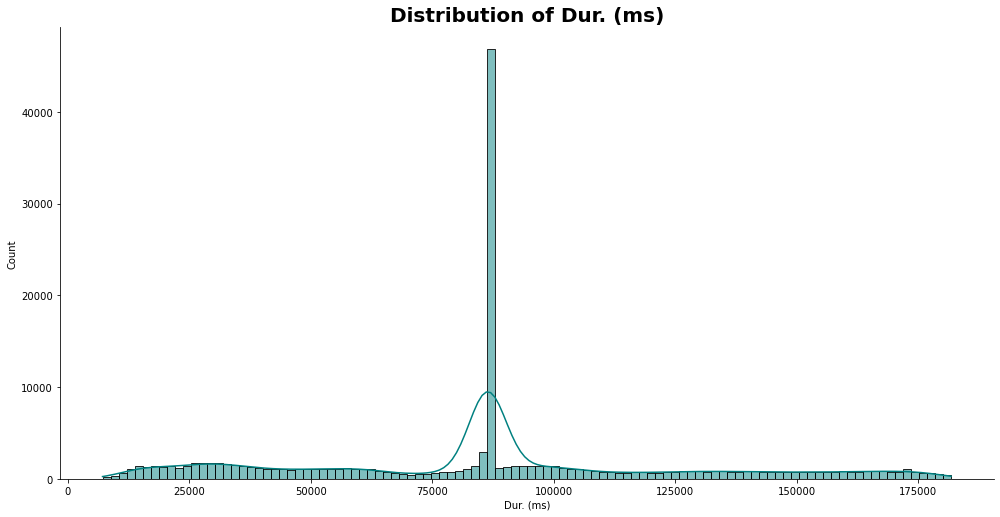

In [35]:
# db['Dur. (ms)'] = fix_outlier(db, ['Dur. (ms)'])

db['Dur. (ms)'] = fix_outlier(db, ['Dur. (ms)'])
plot_hist(db, ['Dur. (ms)'],'teal')

In [36]:
cols_ = {
    'Total Social Media':'sum',
    'Total Google': 'sum', 
    'Total Youtube': 'sum', 
    'Total Netflix':'sum',
    'Total Gaming':'sum',
    'Total Other':'sum',
    'Total Email': 'sum',
    'Total':'sum'
}
app_usage = db.copy()

app_usage["Total Google"]    = app_usage["Google DL (Bytes)"] + app_usage["Google UL (Bytes)"]
app_usage["Total Youtube"]   = app_usage["Youtube DL (Bytes)"] + app_usage["Youtube UL (Bytes)"]
app_usage["Total Netflix"]   = app_usage["Netflix DL (Bytes)"] + app_usage["Netflix UL (Bytes)"]
app_usage["Total Email"]     = app_usage["Email DL (Bytes)"] + app_usage["Email UL (Bytes)"]
app_usage["Total Gaming"]    = app_usage["Gaming DL (Bytes)"] + app_usage["Gaming UL (Bytes)"]
app_usage["Total Social Media"] = app_usage["Social Media DL (Bytes)"] + app_usage["Social Media UL (Bytes)"]
app_usage["Total Other"]     = app_usage["Other DL (Bytes)"] + app_usage["Other UL (Bytes)"]
app_usage["Total Email"]     = app_usage["Email UL (Bytes)"] + app_usage["Email DL (Bytes)"]
app_usage['Total']           = app_usage['Total UL (Bytes)'] + app_usage['Total DL (Bytes)']

user_behaviour = app_usage.groupby('MSISDN/Number').agg(cols_)
user_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 106471 entries, 33601001722.0 to 882397108489451.0
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Total Social Media  106471 non-null  float64
 1   Total Google        106471 non-null  float64
 2   Total Youtube       106471 non-null  float64
 3   Total Netflix       106471 non-null  float64
 4   Total Gaming        106471 non-null  float64
 5   Total Other         106471 non-null  float64
 6   Total Email         106471 non-null  float64
 7   Total               106471 non-null  float64
dtypes: float64(8)
memory usage: 7.3 MB


In [37]:
user_behaviour = app_usage.groupby('MSISDN/Number').agg(cols_)
columns = ['Total Social Media','Total Google','Total Youtube','Total Netflix','Total Gaming', 'Total Other','Total Email','Total' ]
user_behaviour = fix_outlier(user_behaviour, columns)

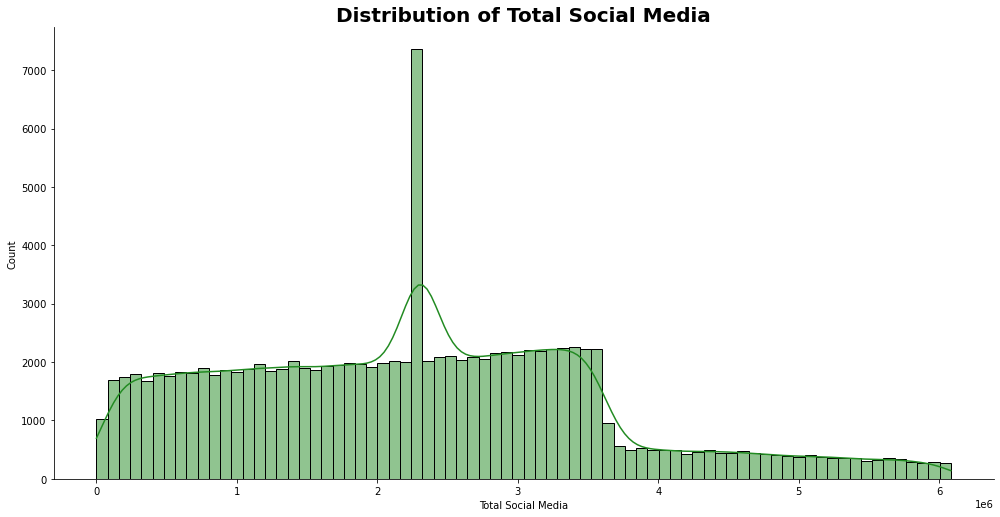

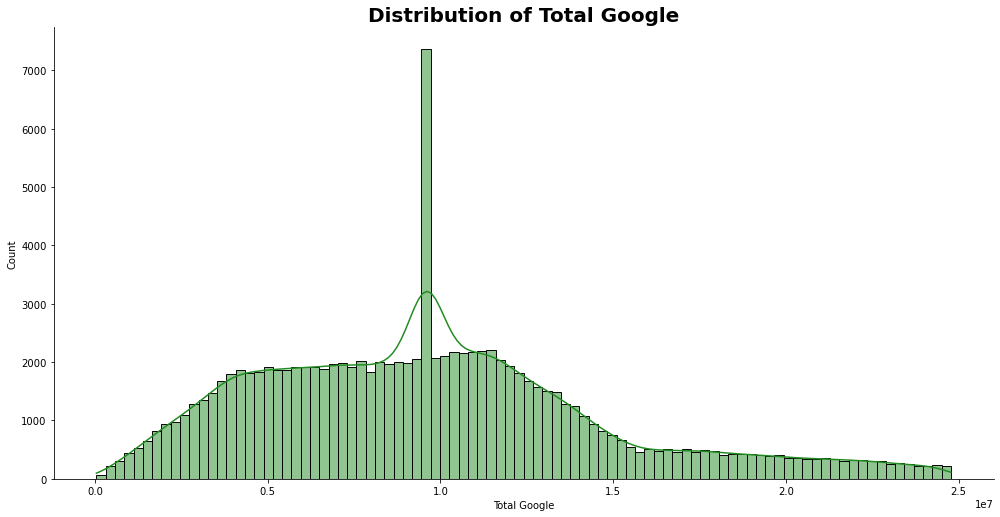

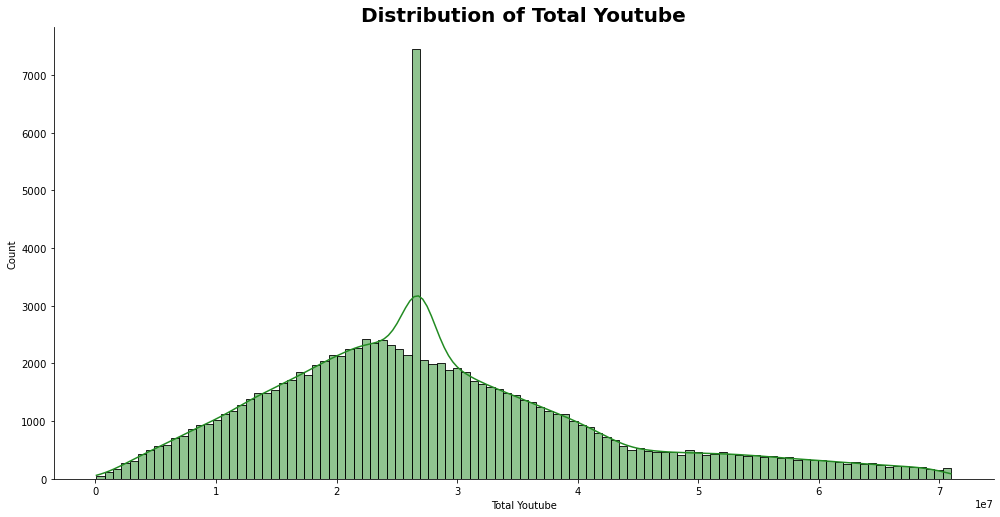

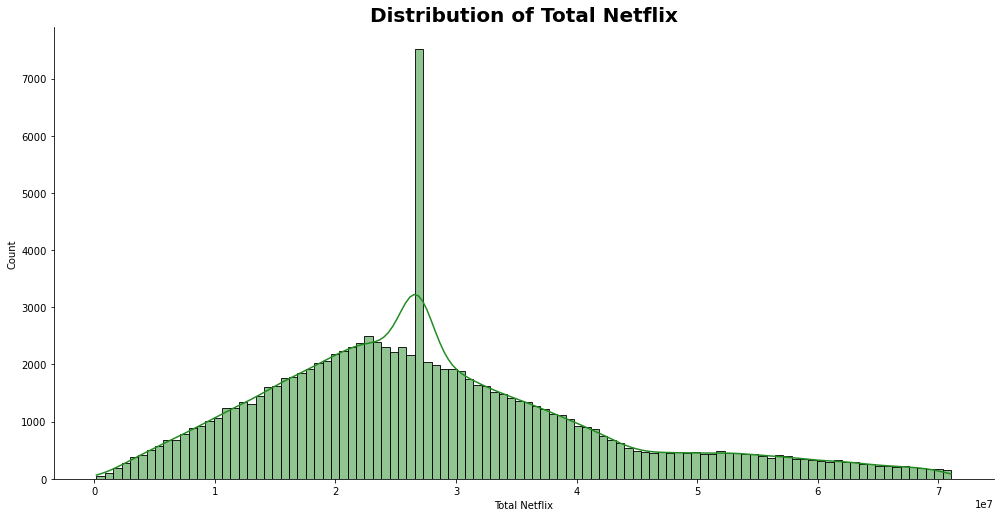

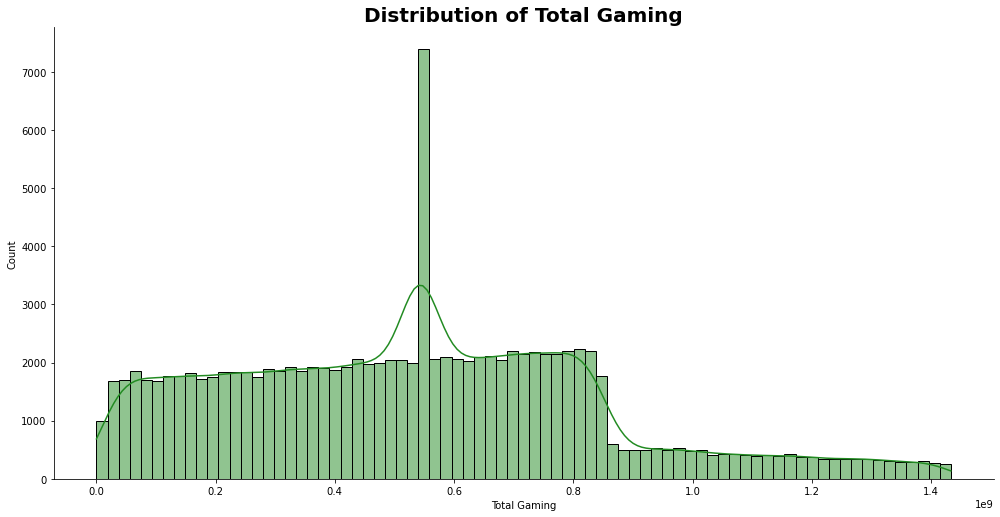

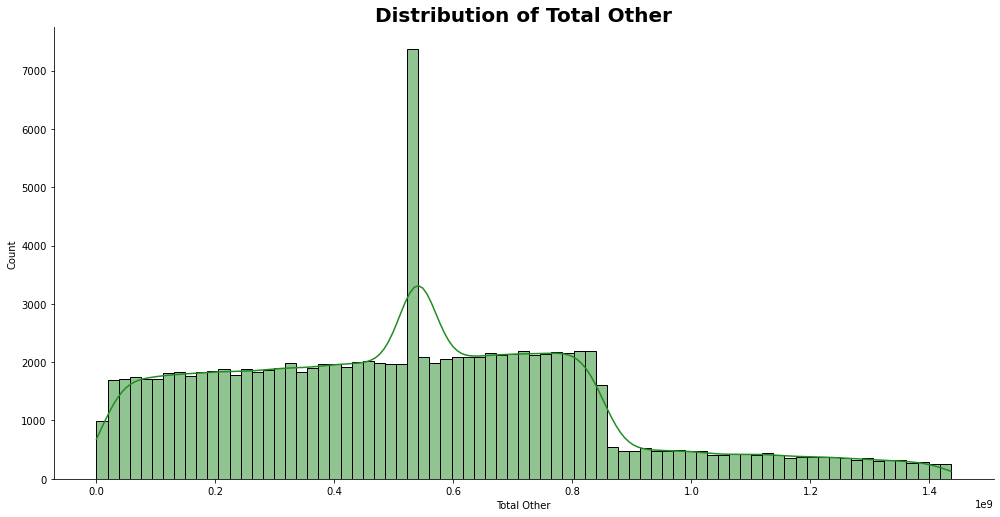

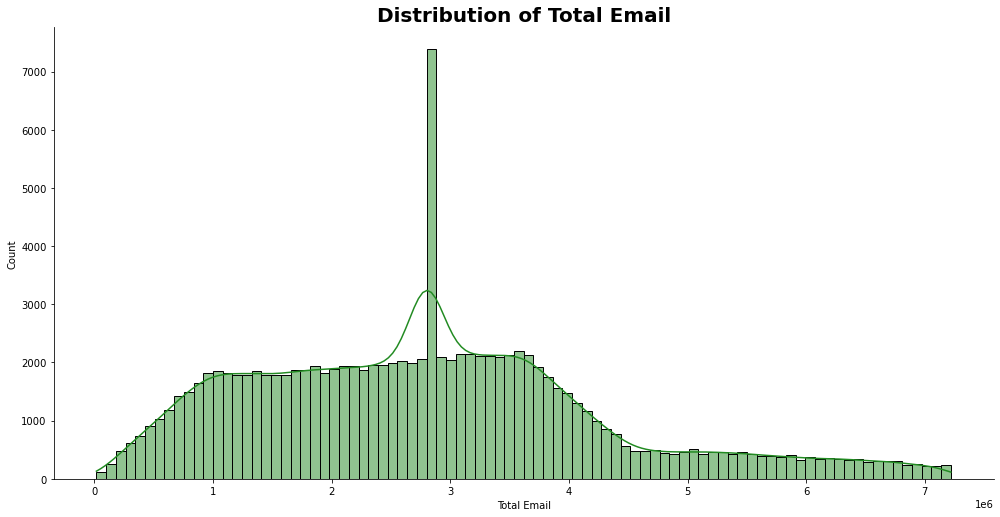

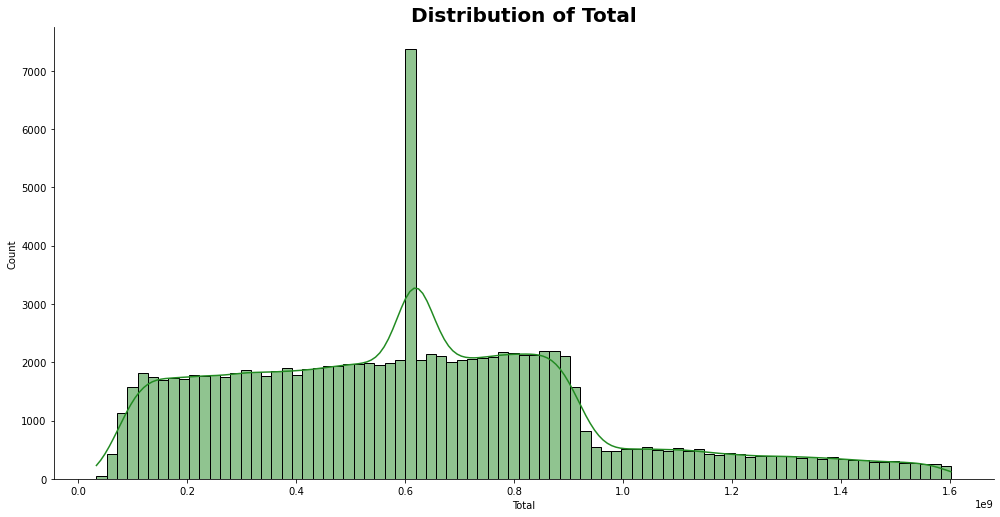

In [39]:
plot_hist(user_behaviour, columns,'forestgreen')

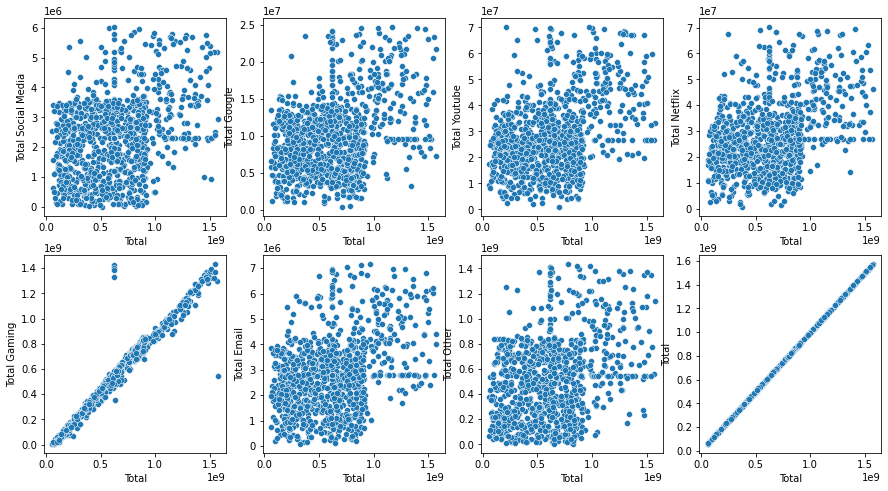

In [40]:
### Scatter Plot

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4,figsize=(15,8))
# plot_scatter(user_behaviour.sample(1000), "Total", "Total Social Media", "Total Vs Social Media",ax1, "", "")

def bivariant_sactter(df, x_col, y_col, ax):
    sns.scatterplot(data = df, x=x_col, y=y_col, ax=ax)

sample_df = user_behaviour.sample(1000)

bivariant_sactter(sample_df, 'Total', 'Total Social Media', ax1)
bivariant_sactter(sample_df, 'Total', 'Total Google', ax2)
bivariant_sactter(sample_df, 'Total', 'Total Youtube', ax3)
bivariant_sactter(sample_df, 'Total', 'Total Netflix', ax4)
bivariant_sactter(sample_df, 'Total', 'Total Gaming', ax5)
bivariant_sactter(sample_df, 'Total', 'Total Email', ax6)
bivariant_sactter(sample_df, 'Total', 'Total Other', ax7)
bivariant_sactter(sample_df, 'Total', 'Total', ax8)

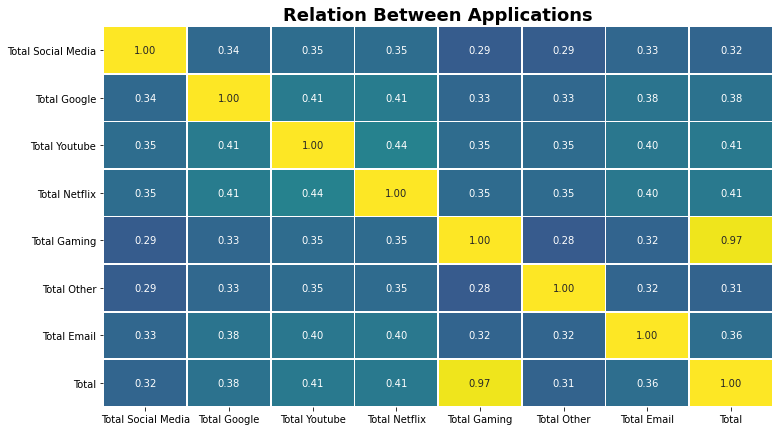

In [41]:
columns=['Total Socil Media', 'Total Google', 'Total Netflix', \
                             'Total Gaming', 'Total Other', 'Total Email']
correlation = user_behaviour.corr()
plot_heatmap(correlation, "Relation Between Applications")

segment the users into top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class. 

In [45]:
new_df = db.copy()
new_df['Total'] = new_df['Total UL (Bytes)'] + new_df['Total DL (Bytes)']
working_df = new_df[['MSISDN/Number','Dur. (ms)','Total']].groupby('MSISDN/Number')\
    .agg({'Dur. (ms)':'sum', 'Total':'sum'}).reset_index()
working_df['classes'] = pd.qcut(working_df['Dur. (ms)'], 5, labels = False)

result = working_df.groupby('classes').agg({'Total':'sum'})
result

,Total
classes,
0,1.152981e+13
1,1.499632e+13
2,8.312002e+12
3,1.271852e+13
4,2.607017e+13


In [49]:
pca_new_df = user_behaviour.copy()
pca = PCA(n_components=4) 
df_pca = pca.fit_transform(pca_new_df)
principal_df = pd.DataFrame(data=df_pca, columns=['feat-1', 'feat-2', 'feat-3', 'feat-4'])
principal_df.head()

,feat-1,feat-2,feat-3,feat-4
0,3.154715e+08,-2.630729e+08,-1.956552e+07,-6.747923e+06
1,-6.636926e+08,-3.219275e+07,-1.000248e+07,-9.956997e+06
2,-1.806478e+07,-2.466513e+07,-1.824708e+07,-9.287728e+06
3,-3.870664e+08,-3.902840e+08,-1.936323e+07,-2.010766e+07
4,1.176833e+09,-1.196709e+08,3.834415e+06,4.945696e+06


In [50]:
scalle_df = user_behaviour.copy()
scalled = StandardScaler().fit_transform(scalle_df)
new_scalled_df = pd.DataFrame(data=scalled, columns=scalle_df.columns)
pca = PCA(n_components=4) 
df_pca = pca.fit_transform(new_scalled_df)
principal_df = pd.DataFrame(data=df_pca, columns=['feat-1', 'feat-2', 'feat-3', 'feat-4'])
principal_df.head()

,feat-1,feat-2,feat-3,feat-4
0,-0.341285,-1.707755,0.215789,-0.603424
1,-2.265504,0.808273,0.751733,-0.400730
2,-0.560677,-0.296982,0.438765,-0.958566
3,-2.686416,-0.994339,0.224468,0.936495
4,4.075650,-1.539754,-0.267568,0.290698


In [68]:
import nbimporter
from Data_cleaning import func1
# from ipynb.fs.full.Data_cleaning import col
func

How Simple
